# **DataBourg DS Interview Task : Real-Time Rain Monitoring using Communication Satellites.**

*Introduction and Context*

In communication satellite systems, satellite operators monitor the connection to each of their
satellite dishes (internet users everywhere on Earth) in real-time. This parameter is the carrier-tonoise (C/N) ratio which can be understood as the signal-to-noise ratio and is measured in dB. In
case of rain above the terminal, the signal drops and there is a clear correlation between the
amount of signal drops and the rain intensity. As the signal is almost only impacted by rain it can
be used as a virtual rain sensor. More precisely, it can be seen as a point measurement of rain at
the location of the satellite dish. Combining many of these rain point measurement allows for
creating rain maps for a full region with e.g. 1km x 1km spatial resolution.

## **I. Data Visualization Process using RainDataPlotter**

The RainDataPlotter class provides a convenient way to visualize rain data from one or multiple DataFrames. The class allows you to plot line, scatter, and histogram plots for selected variables with customizable options such as the sampling rate.

To use the RainDataPlotter class, follow these steps:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

class DataPlotter:
    def __init__(self, dataframes, sampling_rate=1):
        self.dataframes = dataframes
        self.sampling_rate = sampling_rate

    def plot_line(self, column, ax):
        for i, data in enumerate(self.dataframes):
            ax.plot(data['timestamp_utc'][::self.sampling_rate], data[column][::self.sampling_rate], label=f'Data{i+1}')
        ax.set_xlabel('Time Stamp')
        ax.set_ylabel(column)
        ax.legend()

    def plot_scatter(self, column, ax):
        for i, data in enumerate(self.dataframes):
            ax.scatter(data['timestamp_utc'][::self.sampling_rate], data[column][::self.sampling_rate], label=f'Data{i+1}')
        ax.set_xlabel('Time Stamp')
        ax.set_ylabel(column)
        ax.legend()

    def plot_histogram(self, column, ax):
        for i, data in enumerate(self.dataframes):
            sns.histplot(data[column][::self.sampling_rate], bins=20, ax=ax, label=f'Data{i+1}')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.legend()

    def plot(self, plot_type, column):
        fig, ax = plt.subplots(figsize=(12, 8))
        if plot_type == 'line':
            self.plot_line(column, ax)
        elif plot_type == 'scatter':
            self.plot_scatter(column, ax)
        elif plot_type == 'histogram':
            self.plot_histogram(column, ax)
        else:
            print('Invalid plot type. Choose from "line", "scatter", or "histogram".')
        plt.show()


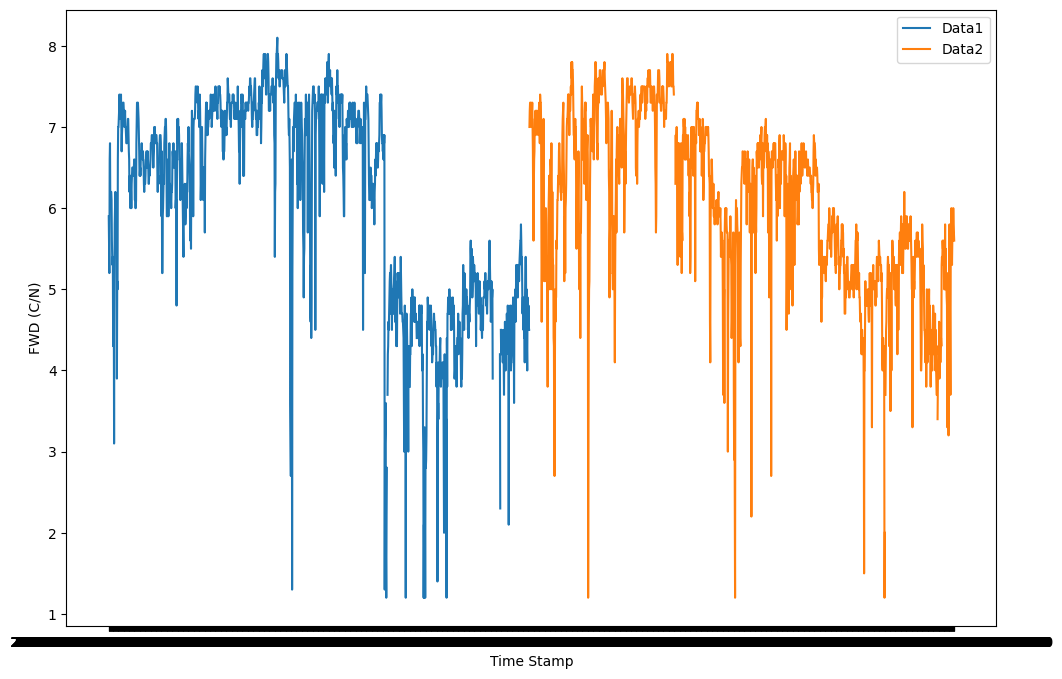

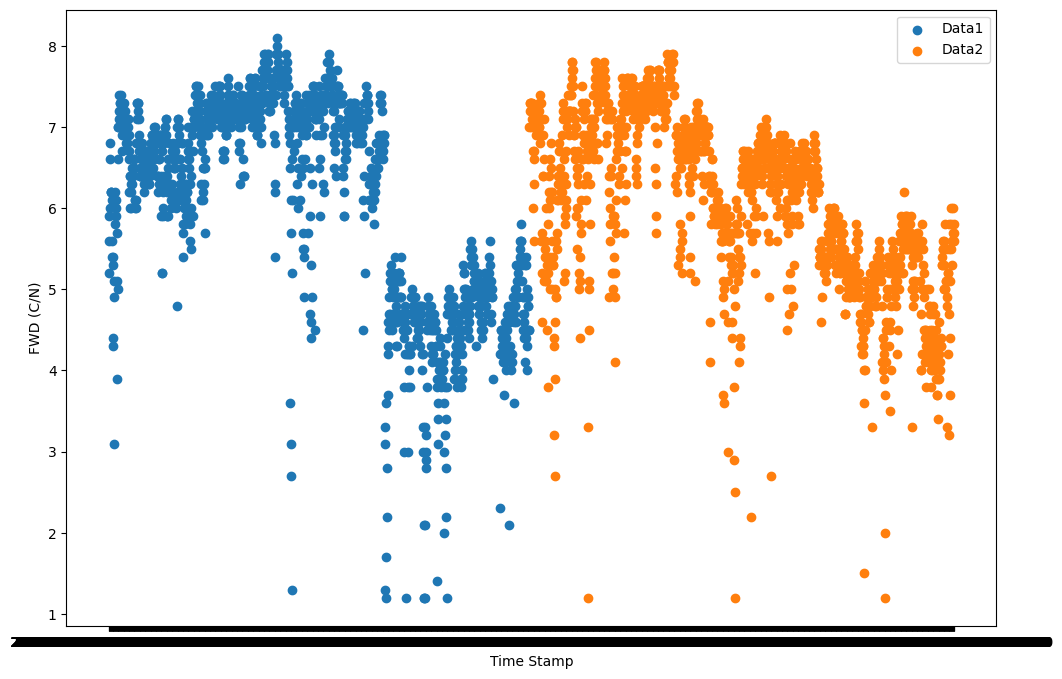

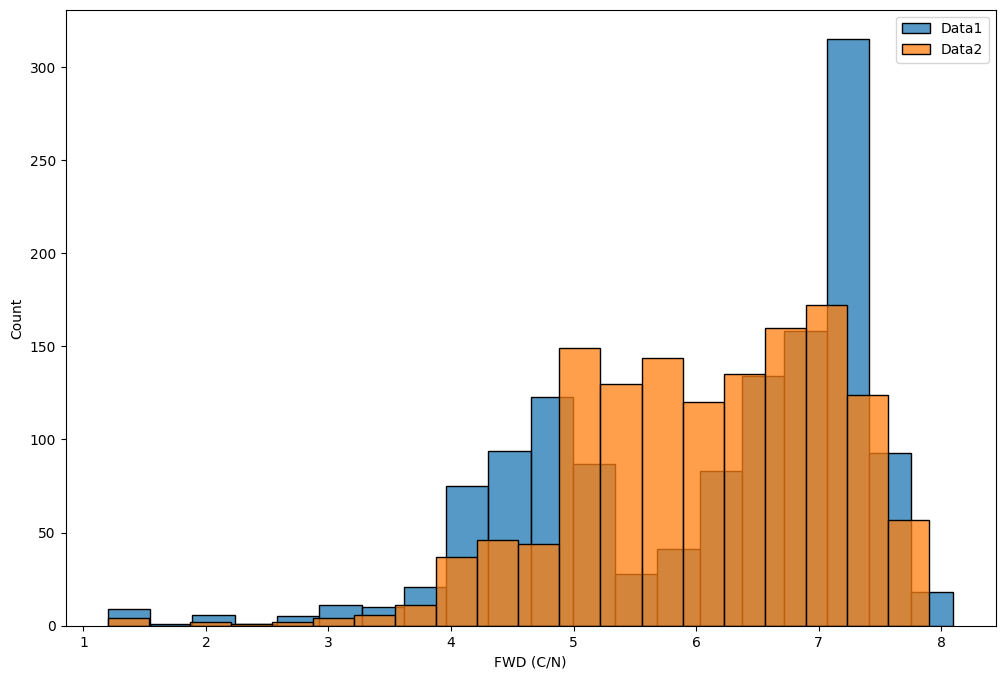

In [ ]:
# Load the data
data1 = pd.read_csv('data1.csv')
data2 = pd.read_csv('data2.csv')

# Create a DataPlotter object
plotter = DataPlotter([data1, data2], sampling_rate=20)
# Plot line plot for 'FWD (C/N)'
plotter.plot('line', 'FWD (C/N)')
# Plot scatter plot for 'FWD (C/N)'
plotter.plot('scatter', 'FWD (C/N)')
# Plot histogram for 'FWD (C/N)'
plotter.plot('histogram', 'FWD (C/N)')



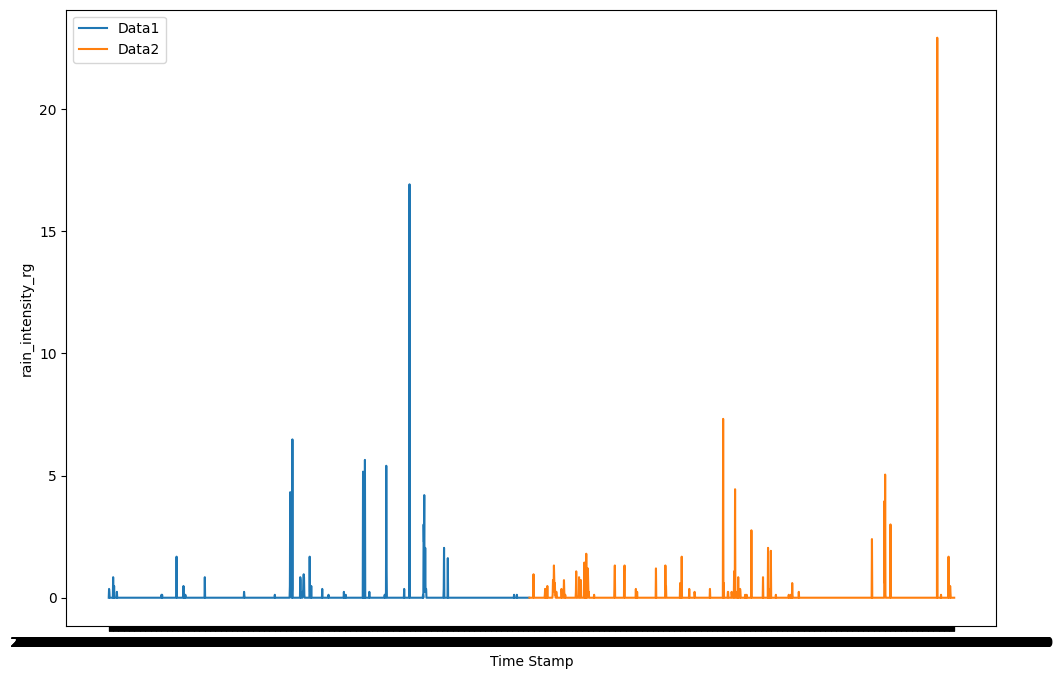

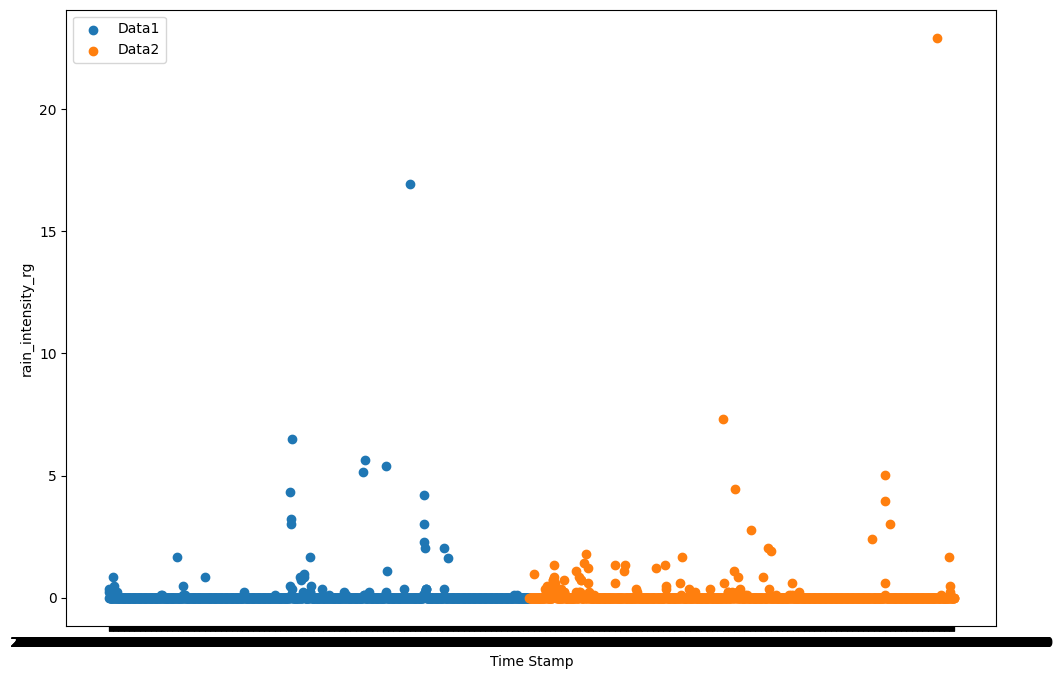

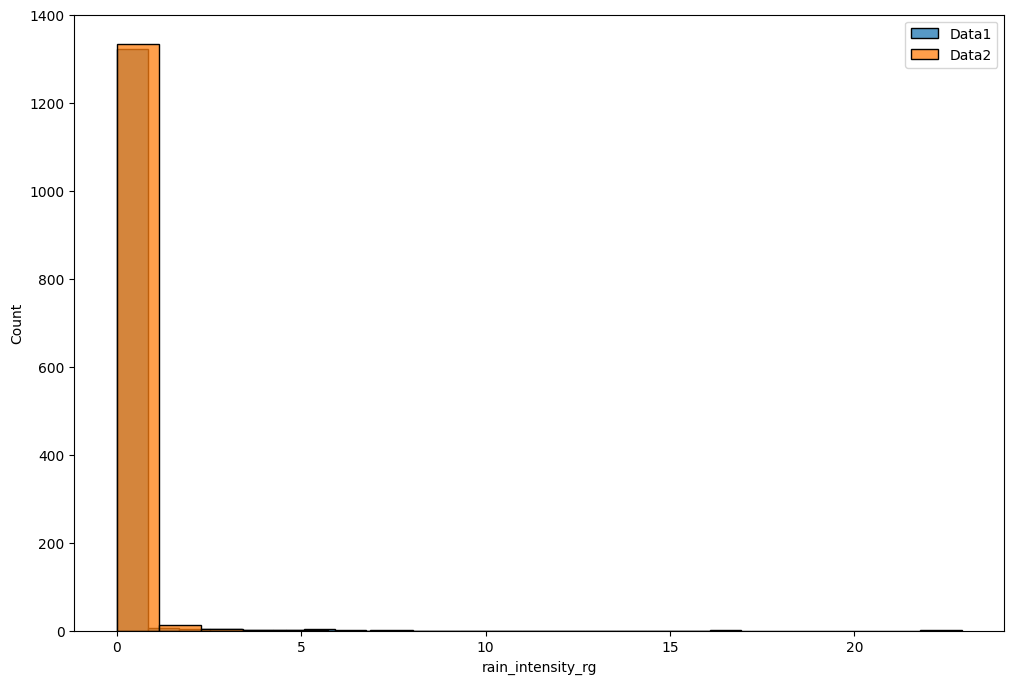

In [ ]:
# Plot line plot for 'rain_intensity_rg'
plotter.plot('line', 'rain_intensity_rg')
# Plot scatter plot for 'rain_intensity_rg'
plotter.plot('scatter', 'rain_intensity_rg')
# Plot histogram for 'rain_intensity_rg'
plotter.plot('histogram', 'rain_intensity_rg')

## **II. Exploratory Data Analysis**

Use the following library :
  `pip install ydata-profiling` for automated Exploratory Data Analysis.



In [ ]:
!pip install ydata-profiling

In [ ]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

profile1 = ProfileReport(data1, title="Profiling Report")
profile2 = ProfileReport(data2, title="Profiling Report1")
profile1.to_notebook_iframe()
profile2.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## **III. Data Preprocessing and Cleaning**

First, we need to check for missing values and handle them appropriately. We also need to convert the timestamp to a format that can be used by our model.

In [ ]:
# Convert timestamp to datetime
data1['timestamp_utc'] = pd.to_datetime(data1['timestamp_utc'])
data2['timestamp_utc'] = pd.to_datetime(data2['timestamp_utc'])

# Check for missing values
print(data1.isnull().sum())
print(data2.isnull().sum())

# If there are missing values, we can fill them with the mean value of the column
data1.fillna(data1.mean(), inplace=True)
data2.fillna(data2.mean(), inplace=True)


timestamp_utc          0
FWD (C/N)            561
rain_intensity_rg      0
dtype: int64
timestamp_utc          0
FWD (C/N)            120
rain_intensity_rg      0
dtype: int64


<ipython-input-10-2d3508060ddb>:10: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data1.fillna(data1.mean(), inplace=True)
<ipython-input-10-2d3508060ddb>:11: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data2.fillna(data2.mean(), inplace=True)


## **IV. Deep Learning for Time Series Regression**

**1. Which machine learning algorithms would you consider for this task ? Mention at least 3 and discuss pros and cons.**

Considering ***machine learning models***, I'd like to use explainable models like polynomial linear regression so that we can easily explain the model and determines features importances. Otherwise, randomforest could enable
us to visualize different decision trees with different features values and enable us to correctly explain our model and assess which features is important however it requires many parameters to tune (number of leaves, trees, depth, which criterion to use gini or else) and can be sometimes difficult to plot and visualize if number of trees are important.
The drawbacks of these two models is that they hardly capture and understand temporal dependencies.

When it comes to **deep-learning models** recurrent neural networks like RNN, LSTM, Bi-LSTM, Long-Long-Memory, ConvLSTM as well and [Transformers](https://towardsdatascience.com/advances-in-deep-learning-for-time-series-forecasting-and-classification-winter-2023-edition-6617c203c1d1) have been applied successfully to time series data problems and are able to infer and comprehend long and short term time series dependencies (or its absence of) on massive amounts of datas.
They are less powerful when you have small amount of datas, costly and difficult to train, hardly explainable if you have a lot of parameters and heavy for real-time inference though you can use technics like hyperparameters optimization, pruning, quantization and hardware inference acceleration with custom hardware or ONNX and XLA.

**2. Do you think it makes sense to split the task into 2 subtasks : first, classify a timestamp into rain/dry event and second, estimate the rain intensity for only the rainy time stamps?**

Yes it could.

  1. *Having two specialized model* : The classifier will only have two options (rain or no rain) checking class imbalances and adjusting the dataset might be easier as well as optimization. Plus it enables us to convert strange values like negative or slightly positive (false positive) to zero thus it will make our predictions smoother..

  2. *The problem can be frame as a hierarchical problem* where loss can be mixed and errors propagated : if the classifier is wrong then it impacts the regressor so regressor loss values can be added to the classifier loss It is indeed very relevant if the classifier performs poorly on heavy rain day or that the regressors predicts heavy rain value on the classifier false positive while he should have predicted values close to zero. To sum up, the classifier is trained as to maximize as well the regressor performances.

  3. *Additional filtering and information leakage*: The classifier predicts whether or not it will rain with a level of uncertainty due the range value of sigmoid functions. Depending on that value, for exemple in the context of false positive, we could forward the information to the regressor which will adapts it's regression by taking into account the level of certainty. Additionally we can filter according to the level of certainty in order to diminish the number of false positive or negatve exemple : 80% of timestamp classified as positive with a confidence interval between 0.5 and 0.65 are in fact negative. That may enable us to minize the level of false and truth positive.

  However the implementation effort of this two steps model requires can be substantial.

  *Data Preprocessing and Cleaning*:

1.   Check for missing values in the data. If there are any, you could use imputation methods to fill them. For example, you could use the mean, median, or mode of the column to fill in missing values, or use a method like linear interpolation if the data is time-series.
3. Normalize the data. Since you're going to use a deep learning model, it's a good practice to normalize the data. This could be done by scaling the features to a range (like 0-1) or standardizing them (subtract mean and divide by standard deviation).
2. Convert the timestamp to a format that can be used by the model. You might want to extract features like hour of the day, day of the week, etc.

**3. Before any experiments, which steps of data preprocessing and cleaning are necessary? Which ways for handling missing data do you propose given this kind of data?**

*Handling Missing Data*:

1. *Imputation methods to fill missing values*. The choice of the method would depend on the nature of the data and the specific column. In our case using a rolling mean with an adaptative window interpolation might be a legitimate method as overall variance is not constant through times, spikes are numerous and strong. However the actual rain value is often similar to the previous and the next one. A pct change or autocorrelation plot could confirm it.

2. For the `"FWD (C/N)"` column, if there's an outage and no data is reported, you could fill this with a special value that indicates an outage, or use a method like forward fill or backward fill, which propagates the last valid observation forward or backward.

*Creating Features*:

  1. *Datetime features* :
  Rain intensity prediction can be infer from the time (since how long it has been raining, short term dependencies will be captured by neural net lstm and feature derivatives) and maybe day of the year, as it is seasonal as well.
  So only want those two timesteps features : minutes of the day (24 x hours x 60 minutes) as a numerical values so that it can be converted to tensor and day of the year (value between 1 and 365) as a num value as well.

  2. *Time series derivatives*:  It would be relevant to create multiple features for exemple for each timestamp : pct change for the last 5 and 20 timestamp and 100, mean for the last 5, 20 and 100 timestamps, RSI and lastly standard deviation for the last 5, 20 and 100 timesteps. Many others time series indicators like kurtosis, wavelet decomposition coefficient, fourier transform, seasonality decompositon coefficient, Hilbert Transform, Stochastic Oscillator, Exponential Moving Average, Autocorellation, stationnary time series, automated differentiation etc ... There is a real work that could be done to create and identify the best performing features though distingushing the causal from noisy one requires a massive effort.

  3. *External/Geophysical, Geographical Features*: Information on windspeed, earth temperature atmoshpere, solar and geomagnetic activity, air moisture, aerosol particules, cloud type, number, density informations, aerobiology surveillance, animals and insect patterns informations and activity, evolutive local geographical indicators like deforestation, field spraying activities, weather radar datas.

(26664, 20, 12)
(26664,)
(26952, 20, 12)
(26952,)
Epoch 1/40
750/750 [==============================] - 30s 39ms/step - loss: 0.4285 - root_mean_squared_error: 0.6546 - mean_absolute_error: 0.1165 - val_loss: 1.1930 - val_root_mean_squared_error: 1.0923 - val_mean_absolute_error: 0.0975
Epoch 2/40
750/750 [==============================] - 28s 37ms/step - loss: 0.4070 - root_mean_squared_error: 0.6380 - mean_absolute_error: 0.1144 - val_loss: 1.1662 - val_root_mean_squared_error: 1.0799 - val_mean_absolute_error: 0.0956
Epoch 3/40
750/750 [==============================] - 28s 38ms/step - loss: 0.3876 - root_mean_squared_error: 0.6226 - mean_absolute_error: 0.1111 - val_loss: 1.1745 - val_root_mean_squared_error: 1.0837 - val_mean_absolute_error: 0.1054
Epoch 4/40
750/750 [==============================] - 30s 40ms/step - loss: 0.4753 - root_mean_squared_error: 0.6894 - mean_absolute_error: 0.1244 - val_loss: 1.1446 - val_root_mean_squared_error: 1.0699 - val_mean_absolute_error: 0.095

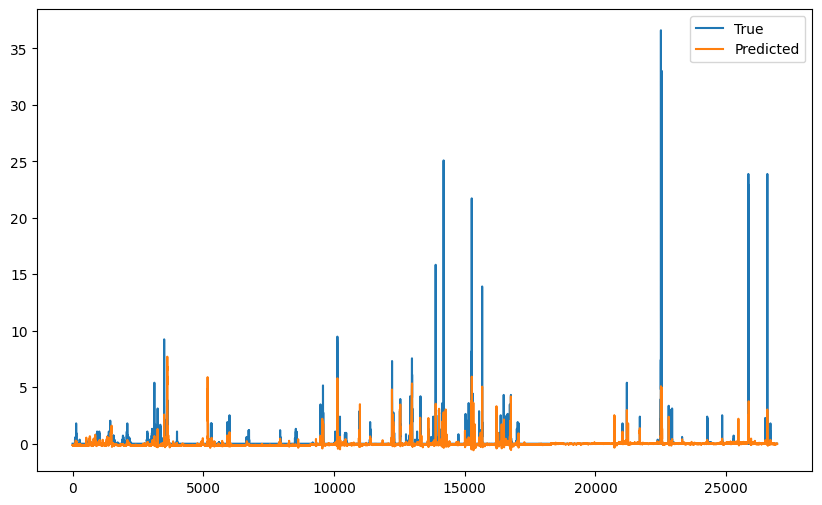

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError, MeanAbsoluteError

# Load the data
data1 = pd.read_csv('data1.csv')
data2 = pd.read_csv('data2.csv')

# Convert timestamp to datetime and extract features
data1['timestamp_utc'] = pd.to_datetime(data1['timestamp_utc']).to_numpy()
data1['minute_of_day'] = (data1['timestamp_utc'].dt.hour * 60 + data1['timestamp_utc'].dt.minute).astype(int)
data1['day_of_year'] = data1['timestamp_utc'].dt.dayofyear.astype(int)

data2['timestamp_utc'] = pd.to_datetime(data2['timestamp_utc']).to_numpy()
data2['minute_of_day'] = (data2['timestamp_utc'].dt.hour * 60 + data2['timestamp_utc'].dt.minute).astype(int)
data2['day_of_year'] = data2['timestamp_utc'].dt.dayofyear.astype(int)


# Preprocessing
# Fill missing values
data1.fillna(method='ffill', inplace=True)
data2.fillna(method='ffill', inplace=True)

# Create additional features
for n in [5, 20, 100]:
    data1['FWD (C/N) pct change ' + str(n)] = data1['FWD (C/N)'].pct_change(periods=n)
    data1['FWD (C/N) mean ' + str(n)] = data1['FWD (C/N)'].rolling(window=n).mean()
    data1['FWD (C/N) std ' + str(n)] = data1['FWD (C/N)'].rolling(window=n).std()

for n in [5, 20, 100]:
    data2['FWD (C/N) pct change ' + str(n)] = data2['FWD (C/N)'].pct_change(periods=n)
    data2['FWD (C/N) mean ' + str(n)] = data2['FWD (C/N)'].rolling(window=n).mean()
    data2['FWD (C/N) std ' + str(n)] = data2['FWD (C/N)'].rolling(window=n).std()

# Drop the rows with NaN values caused by the rolling operations
data1.dropna(inplace=True)
data2.dropna(inplace=True)

# Normalize the data

scaler = MinMaxScaler(feature_range=(0, 1))
features_to_scale = ['FWD (C/N)'] + ['FWD (C/N) pct change ' + str(n) for n in [5, 20, 100]] + ['FWD (C/N) mean ' + str(n) for n in [5, 20, 100]] + ['FWD (C/N) std ' + str(n) for n in [5, 20, 100]] + ['minute_of_day', 'day_of_year']
data1[features_to_scale] = scaler.fit_transform(data1[features_to_scale])
data2[features_to_scale] = scaler.transform(data2[features_to_scale])


# Prepare data for LSTM
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 20

# Reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(data1.drop(columns=['rain_intensity_rg', 'timestamp_utc']), data1['rain_intensity_rg'], time_steps)
X_test, y_test = create_dataset(data2.drop(columns=['rain_intensity_rg', 'timestamp_utc']), data2['rain_intensity_rg'], time_steps)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer=Adam(), loss=MeanSquaredError(), metrics=[RootMeanSquaredError(), MeanAbsoluteError()])

# Train the model
model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.1, shuffle=False)

# Evaluate the model
model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.legend()


Plot the results on a shorter subset:

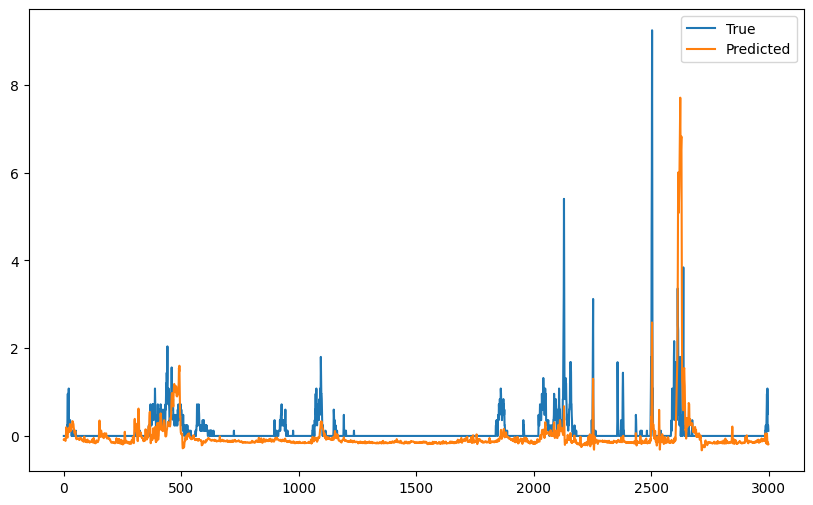

In [ ]:
# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test[1000:4000], label='True')
plt.plot(y_pred[1000:4000], label='Predicted')
plt.legend()

Nice ! the model appears to have some predictive power however other features should be used, hyperparameters optimization should be done : adding more lstm layers, using more recent architectures (transformers) or pretrained models and fine-tuning on our datas if possible, num of timesteps, [loss functions](https://medium.com/@mlblogging.k/14-loss-functions-you-can-use-for-regression-b24db8dff987) that penalize large errors strongly, underestimation, value below or above a certain threshold, quantile etc, penalizing, predicting negative values or equalizing them to zeros. For more in depth analysis see this recent [survey](https://arxiv.org/pdf/2301.05579.pdf) on loss functions for deep-learning.

Creating a bigger training dataset and maybe doing time series data augmentation.

## **V. Rain Interpolation Method and visualization on a Map**

**5. Given a large number of satellite dishes (several 1000s), which algorithms are your first choice to create interpolated rain maps such as the one below?**

We will be using the `folium` library to display a rain interpolation map.

The choice of the spatial interpolation methods (inverse distance weighting (IDW), inverse exponential weighting (IEW), multiple linear regression (MLR), and ordinary kriging (OK) and neirest neighbors) is really geographical and geophysical dependent [[6]](https://www.sciencedirect.com/science/article/pii/S209044792100335X)[[7]](https://link.springer.com/article/10.1007/s00704-022-03927-7).

We need local weather/meterologist expert. In our view, we think that we need a custom adaptative, evolutive, physically and geographically dependent interpolation metric to optimally and realistically interpolate rain value in a particular region.

Additionally computing time and RAM usage should be taken into account especially with large number of satellite stations. We tried Ordinary Kriging and add prohibitive computing time and RAM overload so we choosed NearestNDINterpolator to obtain sometimes seemingly coherent but Inverse Distance Wieghting or IEW might be appropriate.

In [ ]:
!pip install pykrige

Plot individual values at rain station

In [ ]:
import geopandas as gpd
import folium
import numpy as np
from shapely.geometry import Point
from scipy.interpolate import NearestNDInterpolator
import branca.colormap as cm

# Load France map
france = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).loc[lambda df: df['name'] == 'France']

# Generate random points within France using rejection sampling
np.random.seed(0)
n = 100
lons = []
lats = []
while len(lons) < n:
    lon = np.random.uniform(france.total_bounds[0], france.total_bounds[2])
    lat = np.random.uniform(france.total_bounds[1], france.total_bounds[3])
    point = Point(lon, lat)
    if any(france.geometry.contains(point)):
        lons.append(lon)
        lats.append(lat)

# Create a GeoDataFrame of points
points = gpd.GeoDataFrame(geometry=[Point(lon, lat) for lon, lat in zip(lons, lats)])

# Generate random rain data for the points within France
rain = np.random.uniform(0, 100, len(points))

# Create a regular grid within the boundaries of France
gridx = np.linspace(france.total_bounds[0], france.total_bounds[2], 100)
gridy = np.linspace(france.total_bounds[1], france.total_bounds[3], 100)
grid_points = np.meshgrid(gridx, gridy)
grid_points = np.vstack((grid_points[0].flatten(), grid_points[1].flatten())).T

# Perform nearest neighbor interpolation
interpolator = NearestNDInterpolator(list(zip(points.geometry.x, points.geometry.y)), rain)
z = interpolator(grid_points)

# Create a GeoDataFrame for the interpolated points
interpolated_points = gpd.GeoDataFrame(geometry=[Point(x, y) for x, y in grid_points], data={'rain_intensity': z})

# Use a spatial join to find interpolated points within France
interpolated_points = gpd.sjoin(interpolated_points, france, op='within')

# Create a folium map
m = folium.Map(location=[france.geometry.centroid.y.mean(), france.geometry.centroid.x.mean()], zoom_start=6)

# Create a list of [lat, lon, rain_intensity] for each interpolated point within France
heat_data = [[point.y, point.x, intensity] for point, intensity in zip(interpolated_points.geometry, interpolated_points['rain_intensity'])]

# Add the HeatMap to the map
folium.plugins.HeatMap(heat_data).add_to(m)

# Create a colorbar using the "jet" colormap
colormap = cm.LinearColormap(colors=['blue', 'cyan', 'lime', 'yellow', 'red'],
                             vmin=0, vmax=100,
                             caption='Rain intensity')

# Create a colorba
m.add_child(colormap)

m


<ipython-input-29-1b39b6a81f8d>:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  france = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).loc[lambda df: df['name'] == 'France']
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-29-1b39b6a81f8d>:45: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  interpolated_points = gpd.sjoin(interpolated_points, france, op='within')
<ipython-input-29-1b39b6a81f8d>:48

## **VI. Real-time ingestion and inference pipeline**

**6. Imagine a satellite operator pushes a csv file with new C/N data on your Linux data server every five minutes. How would you construct an efficient real-time data pipeline that includes above mentioned algorithm 4), an interpolation strategy 5) and provides a customer API for accessing rain map results? Which components are necessary? Which tools would you use?**

1. **Data Ingestion**: The satellite operator pushes a CSV file with new C/N data every five minutes. Tools suche as Apache NiFi, Cloudera miNifi (we consider our users terminal like IoT device for massive deployment of this service) or Fluentd can be used to monitor the directory where these files are dropped and can ingest the data in real-time and forward it to the next service.

2. **Data Processing**: As described above we have created time series derivatives as well as timestamp derivatives in order to train our deep learning model.
These computations require some time and should be computed as fast as possible. Many options exist, like an optimized data processing python script with numba or jit or with dask array or multiprocessing library. Otherwise a small Spark cluster could be instantiated to compute the feature with pyspark before calling the LSTM model or installing Apache FLink for lightning fast processing of time series if we decide to send the datas row by row.

3. **ML/DL Inference**: The LSTM model previously trained needs to be served in a way that it can make real-time predictions on the incoming data. TensorFlow Serving is a flexible, high-performance serving system for machine learning models, designed for production environments.

 1. *Improving DL model speed with pruning *(deleting operations and neurons) or *quantization* which consists in converting 16/32/64 float ops to lower int ops for exemple ideally a binary neural network two bits per operation only one or zero.
 2. *Accelerating inference speed with custom hardware* like neural accelerator (google coral, intel neural stick ...) or FPGA (Xilinx ...) or open hardware RISC-V-based accelerators and co-processors.
 3. *Improving inference speed with different software layers* like using device with XLA (Google TPU CLoud) with Pytorch XLA or directly compiling with XLA. Or converting to ONNX format and using ONNX runtime.
 4. *Using cloud compute services* : Using optimized Deep-Learning AMI with Amazon Elastic INference or using Google Cloud TPU.

4. **Data Storage**: Then the processed data, along with the model's predictions, need to be stored somewhere. This could be a time-series database like InfluxDB or a more general-purpose database like PostgreSQL. When it comes to time series databases the field is evolving extremly quickly and very efficient database exists.
Beside influxdb, databases like TimescaledDB, QuestDB and TDEngine for exemple.
Very efficient cloud-based TS Databases like AWS Timestream might be considered for petabyte data storage.
In our case the main criteria, ingestion rate, disk space usage and query performances must be considered.
According to this [ranking](https://tdengine.com/tsdb-comparison-influxdb-vs-tdengine/) TDEngine database is lightning fast for all the metrics previously quoted and could drastically improve the speed of our overall pipeline.
Thus, we will be able to easily make request to visualize in real-time our results and to send data to final user or for them to query our api qucikly.

5. **API Layer**: To provide customers with access to the rain map results an API layer must be deployed using a web framework like Flask or Django in Python, or using FastAPI which can queries TDEngine.

 *Deploying our service to the cloud* : If we have massive amount of queries and many clients that query this api we must deploy it so that it's still lightning fast, responsive and doesn't crash. In order to ensure that, many steps must be implemented whether with Kubernetes or with the services of a Cloud Provider :
    
    1. *Load Balancing*: Distribute network traffic across multiple servers to ensure no single server bears too much demand. This can be achieved using services like AWS Elastic Load Balancer, Google Cloud Load Balancer, or Azure Load Balancer.

    2. *Auto-Scaling* : Automatically adjust computational resources based on the volume of requests. This can be done using services like AWS Auto Scaling, Google Cloud AutoScaler, or Azure Virtual Machine Scale Sets.

    3. *Caching*: Store the results of common queries in a cache to reduce the load on our database and speed up response times. This can be done using services like AWS ElastiCache, Google Cloud Memorystore, or Azure Cache for Redis.

    4. *Database Optimization*: By using database indexing, sharding, and other optimization techniques we can speed up query times.

    5. *Content Delivery Network (CDN)*: A CDN like AWS Cloudfront can cache our API's responses and serve them from locations that are geographically closer the0 users, thereby reducing latency.

   6. *Microservices Architecture* :  The applicaton can be  split into smaller, independent components that can be developed, deployed, and scaled independently.

   7. Serverless Architecture: Serverless architecture like AWS Lambda, Google Cloud Functions, or Azure Functions might be enough and might reduce costs.

6. **Monitoring and Alerting**: Tools like Prometheus and Grafana are commonly used to monitor the health of your pipeline and set up alerts for when things go wrong.

7. **Orchestration**: Finally, you would need some kind of orchestration tool to manage all these components. Kubernetes is a popular choice for this, as it can handle scaling, failover, and other operational concerns.

8. **CI/CD**: Continuous Integration and Continuous Deployment (CI/CD) pipelines would be necessary for maintaining the codebase, automating tests, and deploying changes to the pipeline. Tools like Jenkins, GitLab CI/CD, or GitHub Actions can be used for this purpose.

## **VII. Multi-Terminal Algorithm**

**7. A multi-terminal algorithm would involve using data from multiple satellite dishes (terminals) to estimate the rain intensity. This could potentially improve the accuracy of the rain estimation by taking into account the spatial correlation of rainfall.**

Here are some steps to construct such a multi-terminal algorithm:

1. *Data Collection*: Collect data from multiple terminals. This could involve setting up a data pipeline to ingest data from each terminal and store it in a centralized database.

2. *Data Preprocessing*: Similar to the single terminal case, preprocess the data by filling missing values, normalizing the data, and creating additional features.

However the challenge data processing lies elsewhere:

1. *Dataset Formatting*: If you create a single time serie file even with terminal grouped by ID, you have 2D matrices of time series of geographically different terminal and your LSTM processes it as a single time serie it doesn't make sense. It would be relevevant to add a third dimension correspoding to the number of terminals (for exemple 20) and the lstm deal with each one separately and create custom parameters for each terminal.

2. *Complex real-time inference*: However by doing that multi-task learning approach, where the model is trained to predict the rain intensity for all terminals simultaneously, during inference you must have the data for all the terminals almost simultaneously which might not be possible. It can cause delay, problem in data handling and it would consume a lot of computing power.
Plus it requires temporal timestamp/datetime consistency, clock synchronization between the different terminals  which might not be feasible and we might not have control on it.

3. *On-terminal data acquisition synchronisation*: In order to benefit from the multi-terminal usage, values from the geographically closest terminal (features ...) must be integrated to each individual terminal matrice. It makes a lot of features and training can be prohibitively long.

4. *Geographical dependencies and relations* : For each terminal it's necessary to asses which terminal informations carries more importance/influence than others. Assigning a weight ponderations to specific variables for each terminal could be done but requires extensive work and modelisation as dependencies through time and seasons must be asssessed.
Graph Neural Networks (GNN) might be considered as numerous recent publications have recently proposed to use this methods [[1]](https://arxiv.org/pdf/2306.00012.pdf) and even to apply it to rainfall prediction [[2]](https://www.researchgate.net/publication/355245969_CNGAT_A_Graph_Neural_Network_Model_for_Radar_Quantitative_Precipitation_Estimation)[[3]](https://www.researchgate.net/publication/357864556_Fully_distributed_rainfall-runoff_modeling_using_spatial-temporal_graph_neural_network)[[4]](https://www.nature.com/articles/s41598-023-32548-x).

3. *Model Training*: The model should be trained using data from all terminals. This could be done by modifying the LSTM model to accept input from multiple terminals. For example, you could concatenate the features from each terminal, or use a multi-input model where each input corresponds to a different terminal.

4. *Prediction*: Use the trained model to make predictions. The output would be the estimated rain intensity at each terminal. Quantization, pruning and eventually using acceleration inference frameworks like ORT (OnixRuntime) or TensortRT could improve inference speed.

**Advantages of a multi-terminal algorithm**:

Improved Accuracy: By using data from multiple terminals, the model can learn the spatial correlation of rainfall, which could lead to more accurate predictions.

Robustness: If one terminal fails or provides inaccurate data, the model can still make predictions based on data from other terminals.

**Disadvantages of a multi-terminal algorithm**:

*Complexity*: The model and the data pipeline become more complex as the number of terminals increases.

*Computationally Intensive*: Training a model with data from multiple terminals can be computationally intensive, especially if there are a large number of terminals.

*Data Privacy*: If the terminals are owned by different entities, there could be data privacy issues involved in sharing data between terminals.

Here is a code snippet to simulate data from multiple terminals:

Script to create fake 2D datas with multiple terminals

In [ ]:
import pandas as pd
import numpy as np

# Number of terminals
num_terminals = 5

# Number of data points
num_data_points = 2800

# Create a DataFrame for each terminal
data_frames = []
for i in range(num_terminals):
    data = pd.DataFrame({
        'timestamp_utc': pd.date_range(start='2020-11-01', periods=num_data_points, freq='5min'),
        'FWD (C/N)': np.random.normal(loc=6.0, scale=1.0, size=num_data_points),
        'rain_intensity_rg': np.random.normal(loc=0.0, scale=1.0, size=num_data_points)
    })
    data['terminal_id'] = i
    data_frames.append(data)

# Concatenate all DataFrames
data = pd.concat(data_frames)

# Save to CSV
data.to_csv('multi_terminal_data.csv', index=False)


Script to create fake 2D datas with multiple terminals and adding features and informations of closest terminals to each others.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Number of terminals
num_terminals = 20

# Number of data points
num_data_points = 2800

# Generate random geographical coordinates for each terminal
coordinates = np.random.rand(num_terminals, 2)

# Use NearestNeighbors to find the 5 closest terminals for each terminal
nbrs = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(coordinates)
distances, indices = nbrs.kneighbors(coordinates)

# Create a DataFrame for each terminal
data_frames = []
for i in range(num_terminals):
    data = pd.DataFrame({
        'timestamp_utc': pd.date_range(start='2020-11-01', periods=num_data_points, freq='5min'),
        'FWD (C/N)': np.random.normal(loc=6.0, scale=1.0, size=num_data_points),
        'rain_intensity_rg': np.random.normal(loc=0.0, scale=1.0, size=num_data_points)
    })
    data['terminal_id'] = i
    data_frames.append(data)

# For each terminal, add the features of the 5 closest terminals
for i in range(num_terminals):
    for j in range(1, 6):
        closest_terminal_id = indices[i, j]
        closest_terminal_data = data_frames[closest_terminal_id][['FWD (C/N)', 'rain_intensity_rg']].copy()
        closest_terminal_data.columns = [f'closest_{j}_{col}' for col in closest_terminal_data.columns]
        data_frames[i] = pd.concat([data_frames[i], closest_terminal_data.reset_index(drop=True)], axis=1)

# Concatenate all DataFrames
data = pd.concat(data_frames)

# Save to CSV
data.to_csv('multi_terminal_data1.csv', index=False)


Data grouping to create a 3D dataset (number of terminals, number of rows, number of features)

In [ ]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('multi_terminal_data1.csv')

# Convert timestamp to datetime
data['timestamp_utc'] = pd.to_datetime(data['timestamp_utc'])

# Sort the data by terminal_id and timestamp
data.sort_values(by=['terminal_id', 'timestamp_utc'], inplace=True)

# Group the data by terminal_id
grouped = data.groupby('terminal_id')

# Initialize a list to store the 3D data
data_3d = []

# For each group (i.e., terminal), reshape the data into a 3D array and append it to the list
for name, group in grouped:
    group_array = group.drop(columns=['terminal_id', 'timestamp_utc']).values
    group_array = group_array.reshape((1,) + group_array.shape)
    data_3d.append(group_array)

# Concatenate all 3D arrays along the first axis
data_3d = np.concatenate(data_3d, axis=0)

# Now, data_3d is a 3D array of shape (num_terminals, num_data_points, num_features)
print(data_3d.shape)


(20, 2800, 12)


In this approach, the LSTM layer processes the data from all terminals simultaneously and the weights are shared across terminals. The output layer has one neuron for each terminal, so the model predicts the rain intensity for all terminals simultaneously. This allows the model to learn common patterns across terminals, which could potentially improve the accuracy of the predictions.

(20, 2791, 10, 13)
(20, 2775, 10, 12) (20, 2775, 10, 1) (20, 16, 10, 12) (20, 16, 10, 1)
Epoch 1/100
2/2 [==============================] - 2s 320ms/step - loss: 0.1357 - root_mean_squared_error: 0.3684 - mean_absolute_error: 0.3479 - val_loss: 0.1071 - val_root_mean_squared_error: 0.3272 - val_mean_absolute_error: 0.3029
Epoch 2/100
2/2 [==============================] - 0s 77ms/step - loss: 0.0971 - root_mean_squared_error: 0.3116 - mean_absolute_error: 0.2829 - val_loss: 0.0736 - val_root_mean_squared_error: 0.2713 - val_mean_absolute_error: 0.2369
Epoch 3/100
2/2 [==============================] - 0s 78ms/step - loss: 0.0675 - root_mean_squared_error: 0.2599 - mean_absolute_error: 0.2205 - val_loss: 0.0504 - val_root_mean_squared_error: 0.2244 - val_mean_absolute_error: 0.1810
Epoch 4/100
2/2 [==============================] - 0s 73ms/step - loss: 0.0487 - root_mean_squared_error: 0.2206 - mean_absolute_error: 0.1751 - val_loss: 0.0402 - val_root_mean_squared_error: 0.2005 - val_me

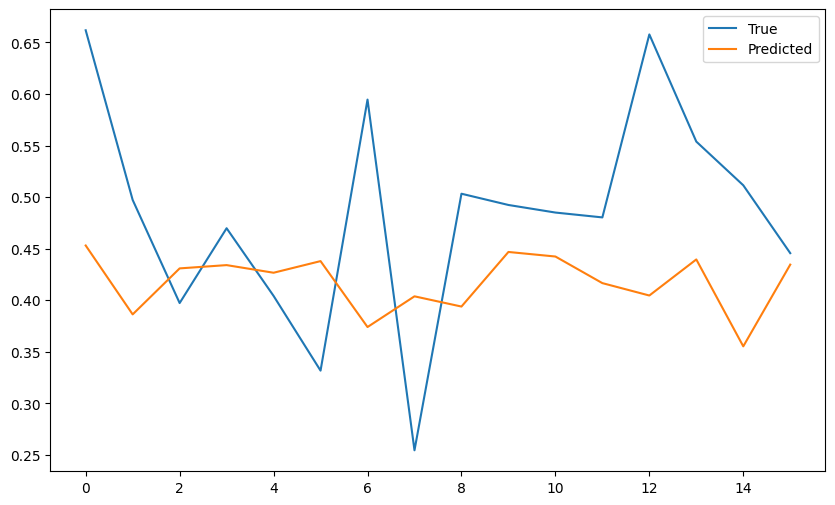

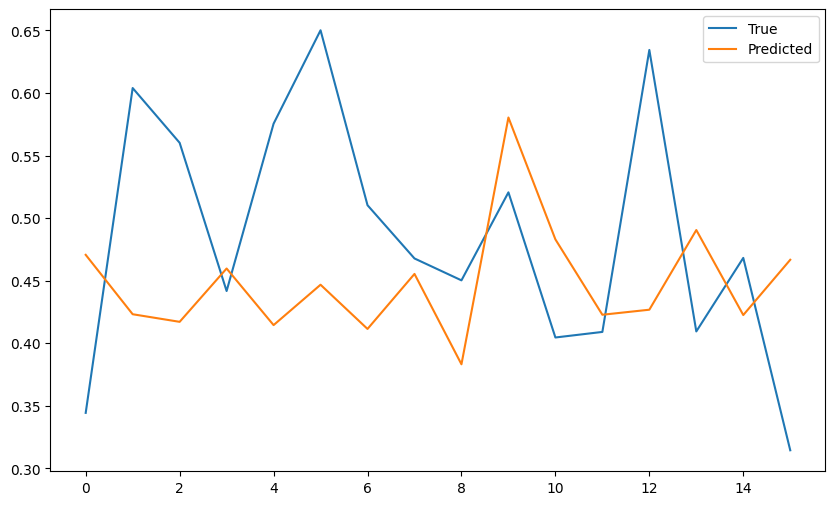

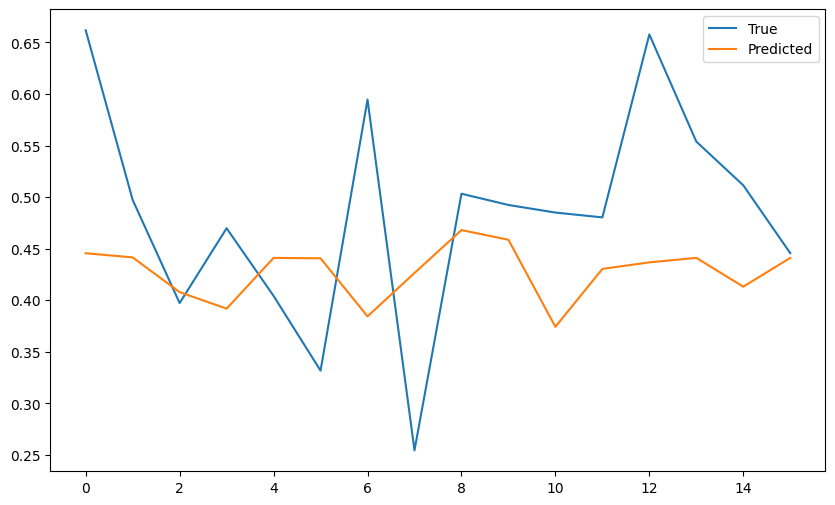

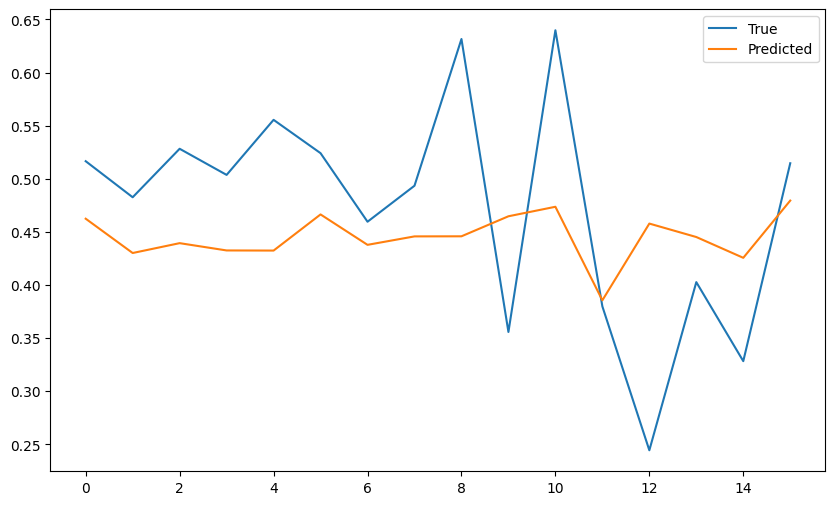

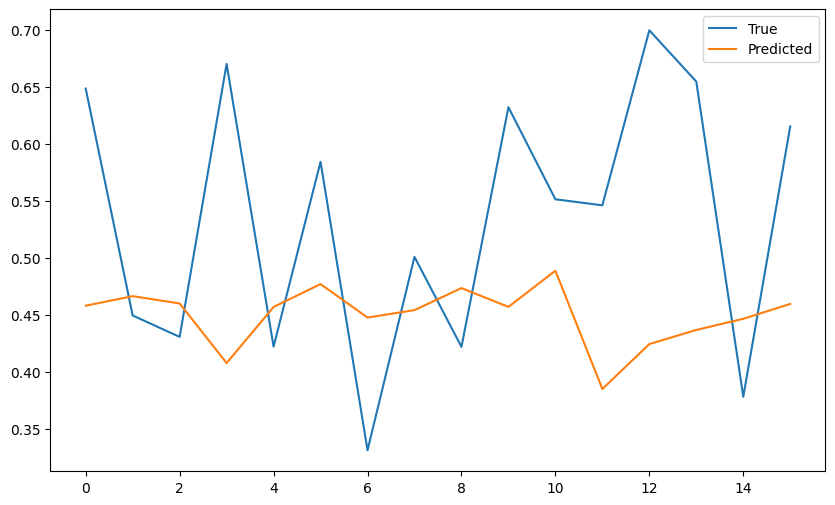

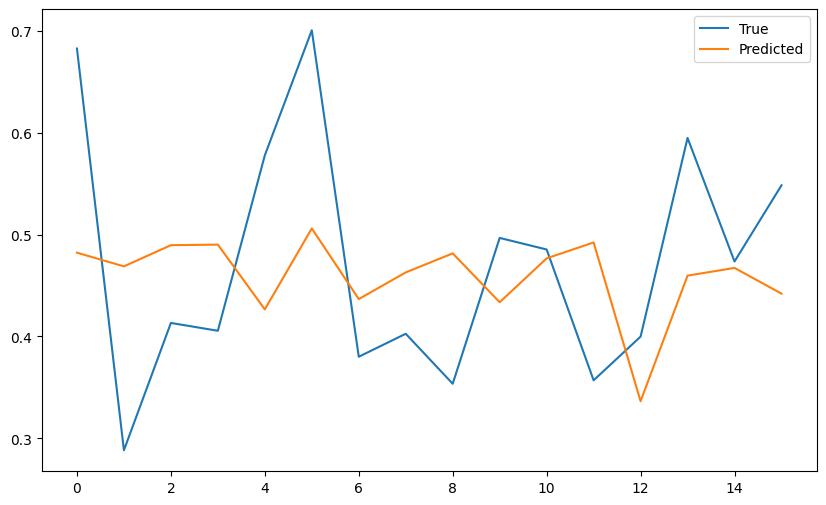

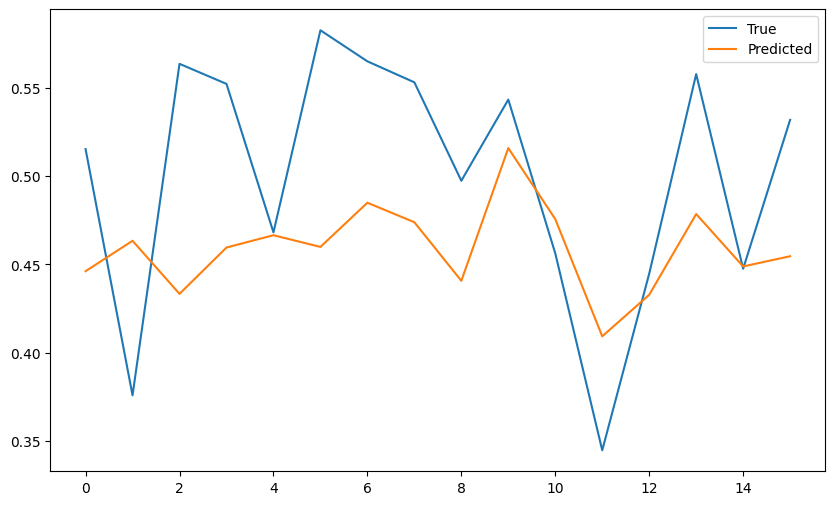

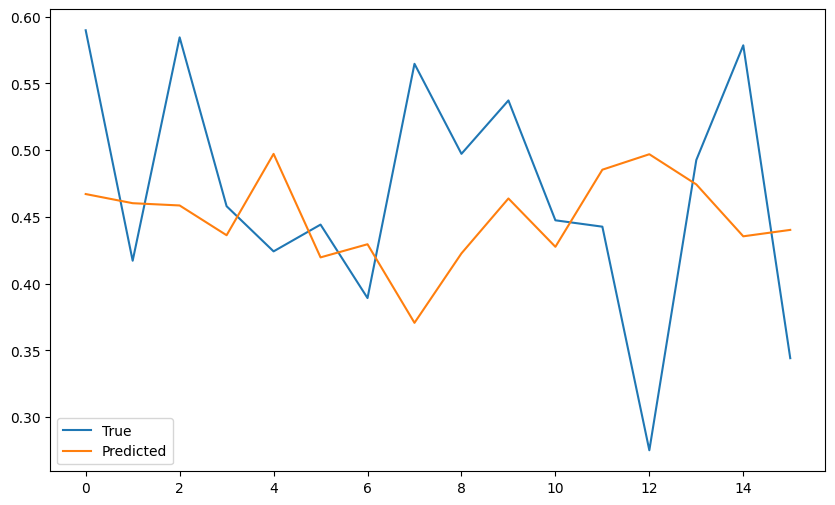

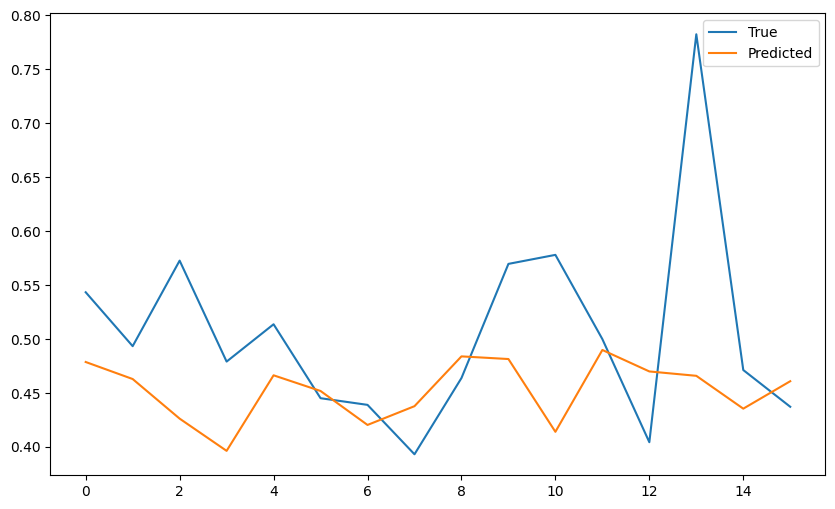

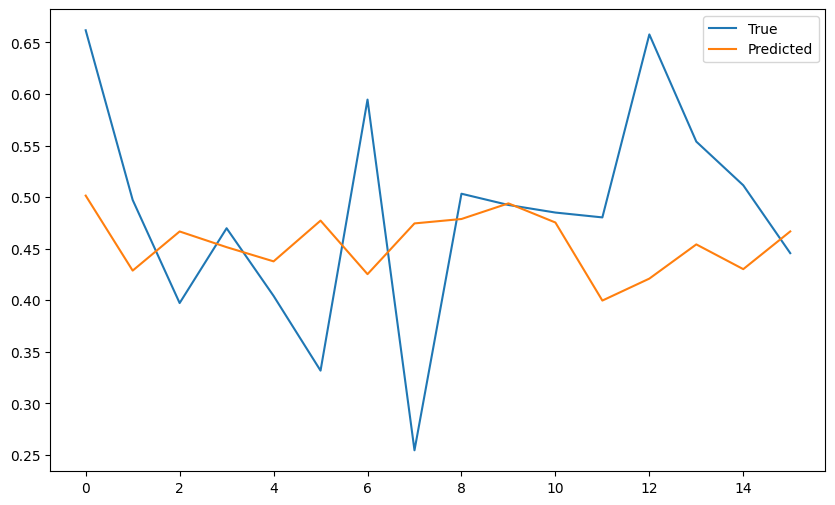

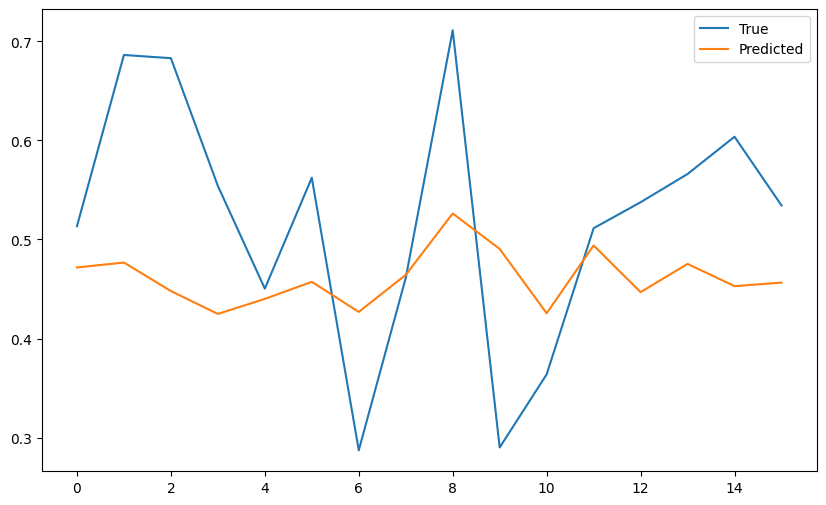

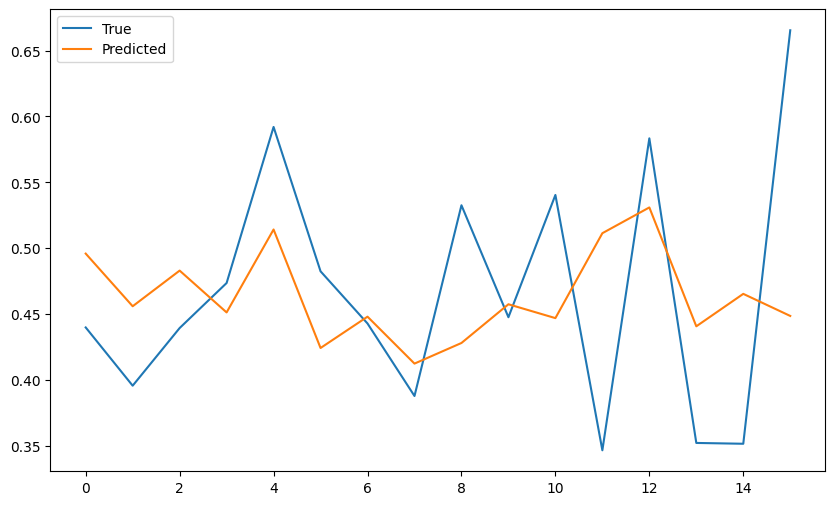

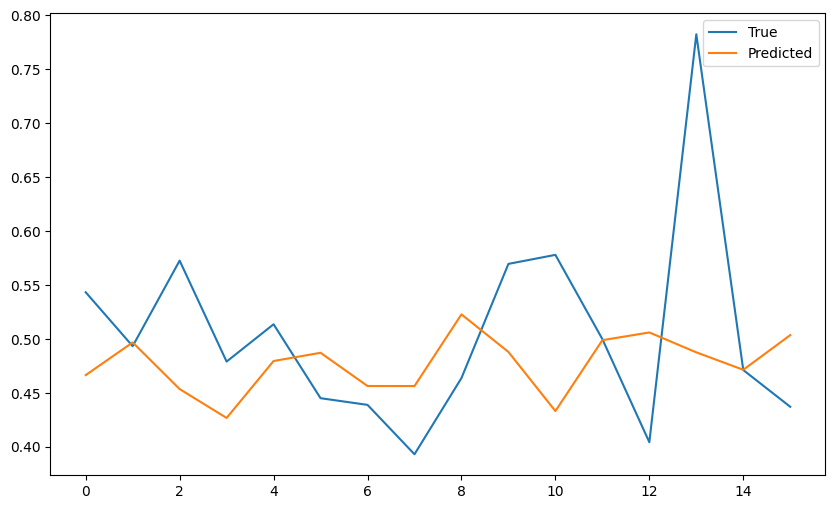

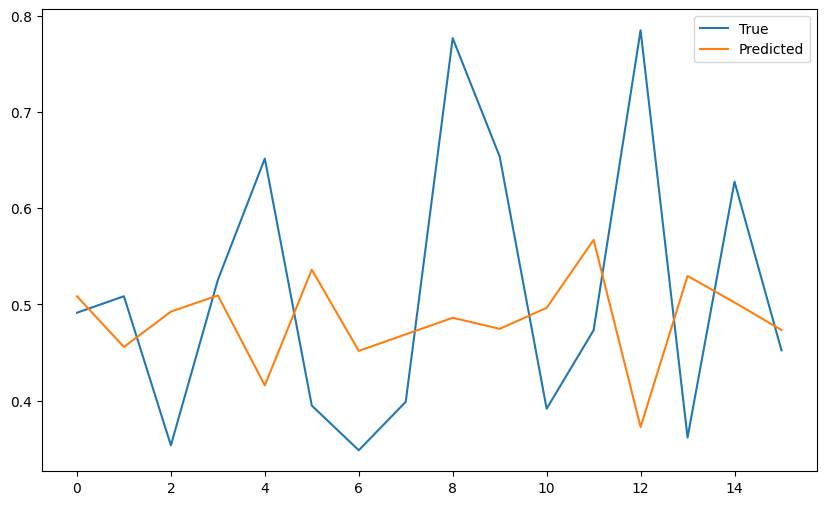

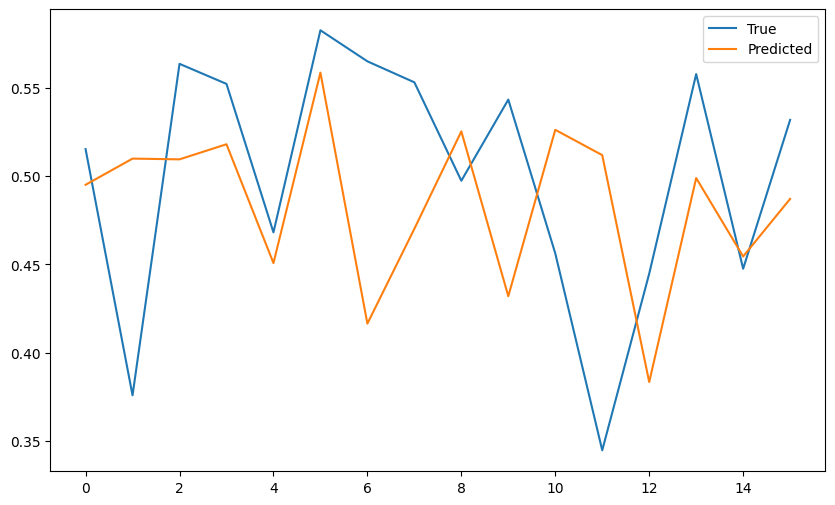

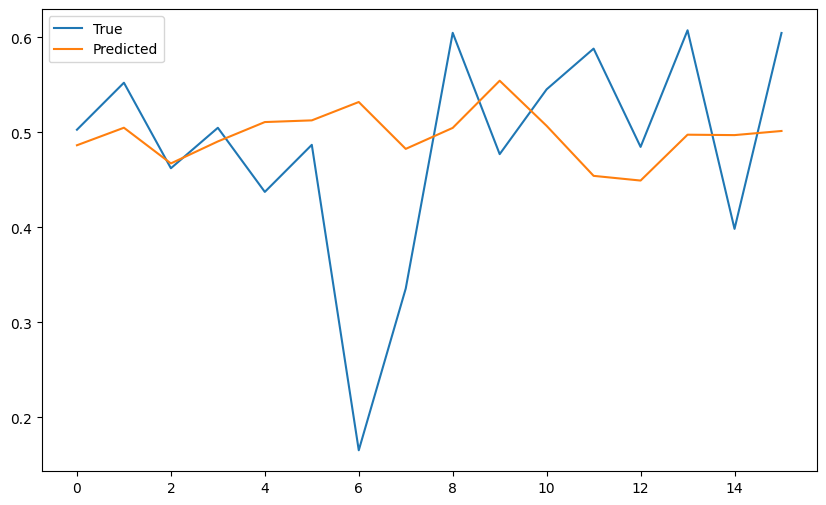

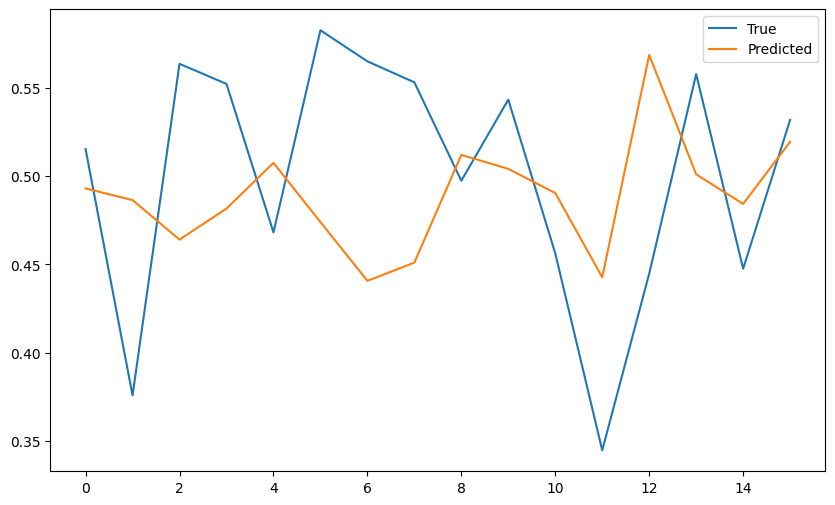

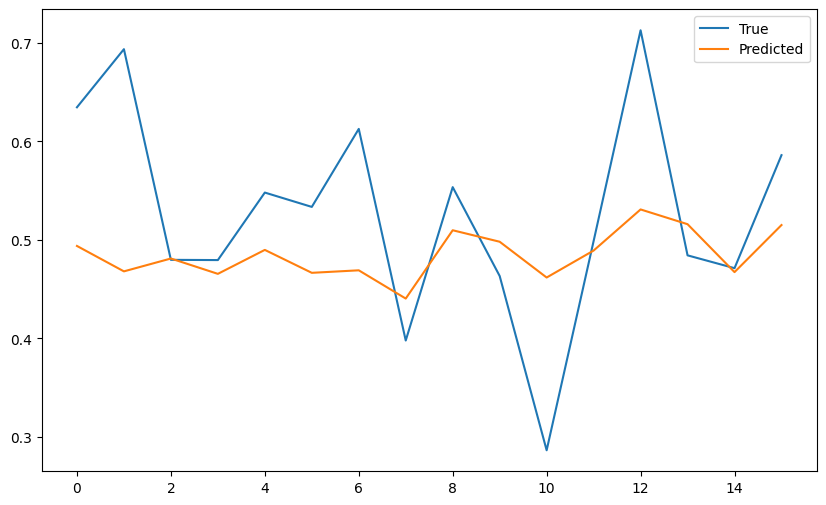

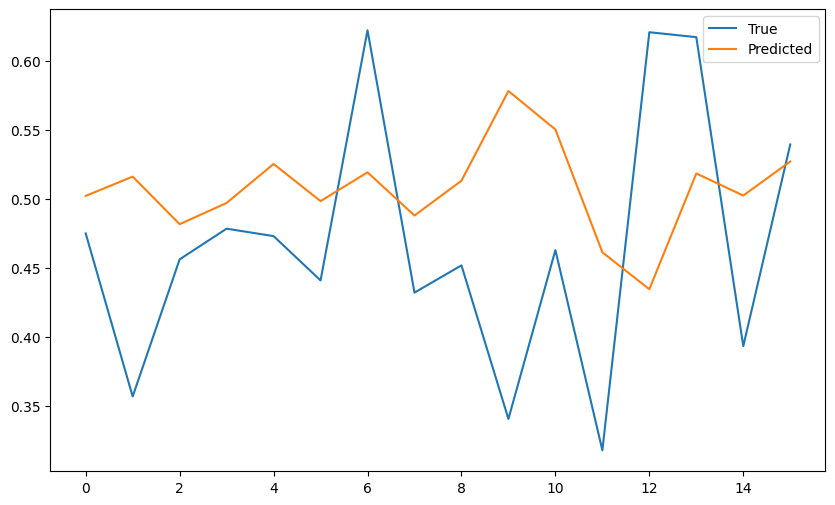

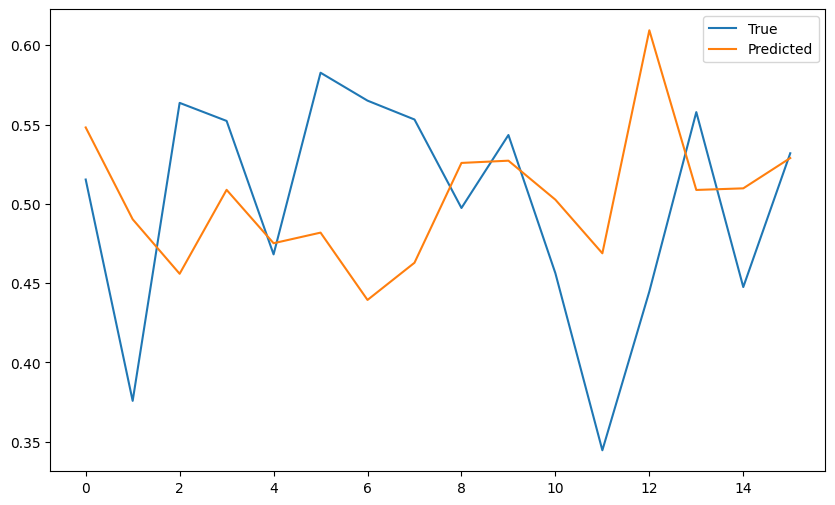

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, TimeDistributed
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Function to create sequences
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length + 1):
        sequence = data[i:i+seq_length]
        sequences.append(sequence)
    return np.array(sequences)

# Load the data
data = pd.read_csv('multi_terminal_data1.csv')

# Convert timestamp to datetime
data['timestamp_utc'] = pd.to_datetime(data['timestamp_utc'])

# Sort the data by terminal_id and timestamp
data.sort_values(by=['terminal_id', 'timestamp_utc'], inplace=True)

# Group the data by terminal_id
grouped = data.groupby('terminal_id')

# Initialize a list to store the 3D data
data_3d = []

# For each group (i.e., terminal), reshape the data into a 3D array and append it to the list
for name, group in grouped:
    group_array = group.drop(columns=['timestamp_utc']).values
    group_array = group_array.reshape((1,) + group_array.shape)
    data_3d.append(group_array)

# Concatenate all 3D arrays along the first axis
data_3d = np.concatenate(data_3d, axis=0)

# Initialize a MinMaxScaler with feature_range (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))

# Flatten the 3D data to 2D in order to fit the scaler
data_2d = data_3d.reshape(-1, data_3d.shape[-1])

# Fit the scaler on the data
scaler.fit(data_2d)

# Transform the data
data_2d = scaler.transform(data_2d)

# Reshape the data back to 3D
data_3d = data_2d.reshape(data_3d.shape)

# Now, data_3d is normalized to the range (0, 1)

# Apply the function to each terminal
data_3d_seq = []
for terminal_data in data_3d:
    terminal_data_seq = create_sequences(terminal_data, 10)
    data_3d_seq.append(terminal_data_seq)

# Convert the list to a numpy array
data_3d_seq = np.array(data_3d_seq)

# Now, data_3d_seq is a 4D array of shape (num_terminals, num_data_points - seq_length + 1, seq_length, num_features)
print(data_3d_seq.shape)

# Split the data into features and target
X = data_3d_seq[:, :, :, :-1]
y = data_3d_seq[:, :, :, -1]

# Add an extra dimension to y
y = np.expand_dims(y, axis=-1)

# Split the data into training and test sets
split_index = int(len(X) * 0.8)
X_train, X_test = X[:, split_index:], X[:, :split_index]
y_train, y_test = y[:, split_index:], y[:, :split_index]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# Build the LSTM model
model = Sequential()
model.add(TimeDistributed(LSTM(50, activation='relu', return_sequences=True), input_shape=(None, X_train.shape[2], X_train.shape[3])))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer=Adam(), loss=MeanSquaredError(), metrics=[RootMeanSquaredError(), MeanAbsoluteError()])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1, shuffle=False)

# Evaluate the model
model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

# Plot the predictions for each terminal
for i in range(num_terminals):
    plt.figure(figsize=(10, 6))
    plt.plot(y_test[i, :, 0], label='True')
    plt.plot(y_pred[i, :, 0], label='Predicted')
    plt.legend()
    plt.show()
